In [1]:
#Importing the necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import NearestNeighbors
import math as m
import scipy.stats as stats

In [2]:
df = pd.read_csv("healthy_lifestyle_city_2021.csv")

In [3]:
df

City  Rank Sunshine hours(City)  \
0          Amsterdam     1                 1858   
1             Sydney     2                 2636   
2             Vienna     3                 1884   
3          Stockholm     4                 1821   
4         Copenhagen     5                 1630   
5           Helsinki     6                 1662   
6            Fukuoka     7                 2769   
7             Berlin     8                 1626   
8          Barcelona     9                 2591   
9          Vancouver    10                 1938   
10         Melbourne    11                 2363   
11           Beijing    12                 2671   
12           Bangkok    13                 2624   
13      Buenos Aires    14                 2525   
14           Toronto    15                 2066   
15            Madrid    16                 2769   
16           Jakarta    17                 2983   
17             Seoul    18                 2066   
18         Frankfurt    19                 1662   
19            Geneva    20                    -   
20          Tel Aviv    21                 3311   
21          Istanbul    22                 2218   
22             Cairo    23                 3542   
23            Taipei    24                 1405   
24       Los Angeles    25                 3254   
25            Mumbai    26                 2584   
26            Boston    27                 2634   
27            Dublin    28                 1453   
28             Tokyo    29                 1877   
29           Chicago    30                 2508   
30         Hong Kong    31                 1836   
31          Shanghai    32                 1776   
32          Brussels    33                 1546   
33     San Francisco    34                 3062   
34             Paris    35                 1662   
35         Sao Paulo    36                 2003   
36            Zurich    37                 1566   
37            London    38                 1633   
38      Johannesburg    39                 3124   
39             Milan    40                 1915   
40  Washington, D.C.    41                 2528   
41          New York    42                 2535   
42            Moscow    43                 1901   
43       Mexico City    44                 2555   

   Cost of a bottle of water(City) Obesity levels(Country)  \
0                            £1.92                  20.40%   
1                            £1.48                  29.00%   
2                            £1.94                  20.10%   
3                            £1.72                  20.60%   
4                            £2.19                  19.70%   
5                            £1.60                  22.20%   
6                            £0.78                   4.30%   
7                            £1.55                  22.30%   
8                            £1.19                  23.80%   
9                            £1.08                  29.40%   
10                           £1.57                  29.00%   
11                           £0.26                   6.20%   
12                           £0.22                  10.00%   
13                           £0.57                  28.30%   
14                           £1.09                  29.40%   
15                           £1.30                  23.80%   
16                           £0.21                   6.90%   
17                           £0.59                   4.70%   
18                           £1.95                  22.30%   
19                           £2.62                  19.50%   
20                           £1.63                  26.10%   
21                           £0.15                  32.10%   
22                           £0.16                  32.00%   
23                           £0.57                   6.20%   
24                           £1.52                  36.20%   
25                           £0.15                   3.90%   
26                           £1.39            

In [4]:
df.shape

(44, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   City                                    44 non-null     object 
 1   Rank                                    44 non-null     int64  
 2   Sunshine hours(City)                    44 non-null     object 
 3   Cost of a bottle of water(City)         44 non-null     object 
 4   Obesity levels(Country)                 44 non-null     object 
 5   Life expectancy(years) (Country)        44 non-null     float64
 6   Pollution(Index score) (City)           44 non-null     object 
 7   Annual avg. hours worked                44 non-null     object 
 8   Happiness levels(Country)               44 non-null     float64
 9   Outdoor activities(City)                44 non-null     int64  
 10  Number of take out places(City)         44 non-null     int64  


In [6]:
#Changing obesity levels to float and remeoving the percentage sign
df['Obesity levels(Country)'] = df['Obesity levels(Country)'].str.replace('%', '', regex=False)

In [7]:
df['Obesity levels(Country)'] = df['Obesity levels(Country)'].astype(str).astype(float)

In [8]:
#Remove Euro sign from cost of water
df['Cost of a bottle of water(City)'] = df['Cost of a bottle of water(City)'].str.replace('£', '', regex=False)

In [9]:
#Changing cost of water data type to float
df['Cost of a bottle of water(City)'] = df['Cost of a bottle of water(City)'].astype(str).astype(float)

In [10]:
#Same for gym membership
df['Cost of a monthly gym membership(City)'] = df['Cost of a monthly gym membership(City)'].str.replace('£', '', regex=False)
df['Cost of a monthly gym membership(City)'] = df['Cost of a monthly gym membership(City)'].astype(str).astype(float)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   City                                    44 non-null     object 
 1   Rank                                    44 non-null     int64  
 2   Sunshine hours(City)                    44 non-null     object 
 3   Cost of a bottle of water(City)         44 non-null     float64
 4   Obesity levels(Country)                 44 non-null     float64
 5   Life expectancy(years) (Country)        44 non-null     float64
 6   Pollution(Index score) (City)           44 non-null     object 
 7   Annual avg. hours worked                44 non-null     object 
 8   Happiness levels(Country)               44 non-null     float64
 9   Outdoor activities(City)                44 non-null     int64  
 10  Number of take out places(City)         44 non-null     int64  


In [12]:
#Getting rid of special symbols in some columns

df['Pollution(Index score) (City)'] = df['Pollution(Index score) (City)'].replace({'-': np.nan}, regex=True)

In [13]:
df['Sunshine hours(City)'] = df['Sunshine hours(City)'].replace({'-': np.nan}, regex=True)

In [14]:
df['Annual avg. hours worked'] = df['Annual avg. hours worked'].replace({'-': np.nan}, regex=True)

In [15]:
df

City  Rank Sunshine hours(City)  \
0          Amsterdam     1                 1858   
1             Sydney     2                 2636   
2             Vienna     3                 1884   
3          Stockholm     4                 1821   
4         Copenhagen     5                 1630   
5           Helsinki     6                 1662   
6            Fukuoka     7                 2769   
7             Berlin     8                 1626   
8          Barcelona     9                 2591   
9          Vancouver    10                 1938   
10         Melbourne    11                 2363   
11           Beijing    12                 2671   
12           Bangkok    13                 2624   
13      Buenos Aires    14                 2525   
14           Toronto    15                 2066   
15            Madrid    16                 2769   
16           Jakarta    17                 2983   
17             Seoul    18                 2066   
18         Frankfurt    19                 1662   
19            Geneva    20                  NaN   
20          Tel Aviv    21                 3311   
21          Istanbul    22                 2218   
22             Cairo    23                 3542   
23            Taipei    24                 1405   
24       Los Angeles    25                 3254   
25            Mumbai    26                 2584   
26            Boston    27                 2634   
27            Dublin    28                 1453   
28             Tokyo    29                 1877   
29           Chicago    30                 2508   
30         Hong Kong    31                 1836   
31          Shanghai    32                 1776   
32          Brussels    33                 1546   
33     San Francisco    34                 3062   
34             Paris    35                 1662   
35         Sao Paulo    36                 2003   
36            Zurich    37                 1566   
37            London    38                 1633   
38      Johannesburg    39                 3124   
39             Milan    40                 1915   
40  Washington, D.C.    41                 2528   
41          New York    42                 2535   
42            Moscow    43                 1901   
43       Mexico City    44                 2555   

    Cost of a bottle of water(City)  Obesity levels(Country)  \
0                              1.92                     20.4   
1                              1.48                     29.0   
2                              1.94                     20.1   
3                              1.72                     20.6   
4                              2.19                     19.7   
5                              1.60                     22.2   
6                              0.78                      4.3   
7                              1.55                     22.3   
8                              1.19                     23.8   
9                              1.08                     29.4   
10                             1.57                     29.0   
11                             0.26                      6.2   
12                             0.22                     10.0   
13                             0.57                     28.3   
14                             1.09                     29.4   
15                             1.30                     23.8   
16                             0.21                      6.9   
17                             0.59                      4.7   
18                             1.95                     22.3   
19                             2.62                     19.5   
20                             1.63                     26.1   
21                             0.15                     32.1   
22                             0.16                     32.0   
23                             0.57                      6.2   
24                             1.52                     36.2   
25                             0.15                     

In [16]:
#Will also convert data types for Annual hours worked and sunshine hours
df['Annual avg. hours worked'] = df['Annual avg. hours worked'].astype(str).astype(float)


In [17]:
#Sunshine hours from object data type to integer
df["Sunshine hours(City)"] = df["Sunshine hours(City)"].astype(np.number)


/Users/ireneadeke/Desktop/anaconda3/lib/python3.11/site-packages/pandas/core/dtypes/common.py:1691: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  npdtype = np.dtype(dtype)


In [18]:
df['Pollution(Index score) (City)'] = df['Pollution(Index score) (City)'].astype(str).astype(float)

In [19]:
df

City  Rank  Sunshine hours(City)  \
0          Amsterdam     1                1858.0   
1             Sydney     2                2636.0   
2             Vienna     3                1884.0   
3          Stockholm     4                1821.0   
4         Copenhagen     5                1630.0   
5           Helsinki     6                1662.0   
6            Fukuoka     7                2769.0   
7             Berlin     8                1626.0   
8          Barcelona     9                2591.0   
9          Vancouver    10                1938.0   
10         Melbourne    11                2363.0   
11           Beijing    12                2671.0   
12           Bangkok    13                2624.0   
13      Buenos Aires    14                2525.0   
14           Toronto    15                2066.0   
15            Madrid    16                2769.0   
16           Jakarta    17                2983.0   
17             Seoul    18                2066.0   
18         Frankfurt    19                1662.0   
19            Geneva    20                   NaN   
20          Tel Aviv    21                3311.0   
21          Istanbul    22                2218.0   
22             Cairo    23                3542.0   
23            Taipei    24                1405.0   
24       Los Angeles    25                3254.0   
25            Mumbai    26                2584.0   
26            Boston    27                2634.0   
27            Dublin    28                1453.0   
28             Tokyo    29                1877.0   
29           Chicago    30                2508.0   
30         Hong Kong    31                1836.0   
31          Shanghai    32                1776.0   
32          Brussels    33                1546.0   
33     San Francisco    34                3062.0   
34             Paris    35                1662.0   
35         Sao Paulo    36                2003.0   
36            Zurich    37                1566.0   
37            London    38                1633.0   
38      Johannesburg    39                3124.0   
39             Milan    40                1915.0   
40  Washington, D.C.    41                2528.0   
41          New York    42                2535.0   
42            Moscow    43                1901.0   
43       Mexico City    44                2555.0   

    Cost of a bottle of water(City)  Obesity levels(Country)  \
0                              1.92                     20.4   
1                              1.48                     29.0   
2                              1.94                     20.1   
3                              1.72                     20.6   
4                              2.19                     19.7   
5                              1.60                     22.2   
6                              0.78                      4.3   
7                              1.55                     22.3   
8                              1.19                     23.8   
9                              1.08                     29.4   
10                             1.57                     29.0   
11                             0.26                      6.2   
12                             0.22                     10.0   
13                             0.57                     28.3   
14                             1.09                     29.4   
15                             1.30                     23.8   
16                             0.21                      6.9   
17                             0.59                      4.7   
18                             1.95                     22.3   
19                             2.62                     19.5   
20                             1.63                     26.1   
21                             0.15                     32.1   
22                             0.16                     32.0   
23                             0.57                      6.2   
24                             1.52                     36.2   
25         

In [20]:
#Checking for duplicates
df[df.duplicated()]
#No duplicates

Empty DataFrame
Columns: [City, Rank, Sunshine hours(City), Cost of a bottle of water(City), Obesity levels(Country), Life expectancy(years) (Country), Pollution(Index score) (City), Annual avg. hours worked, Happiness levels(Country), Outdoor activities(City), Number of take out places(City), Cost of a monthly gym membership(City)]
Index: []

In [21]:
df.isna().sum()

City                                       0
Rank                                       0
Sunshine hours(City)                       1
Cost of a bottle of water(City)            0
Obesity levels(Country)                    0
Life expectancy(years) (Country)           0
Pollution(Index score) (City)              1
Annual avg. hours worked                  11
Happiness levels(Country)                  0
Outdoor activities(City)                   0
Number of take out places(City)            0
Cost of a monthly gym membership(City)     0
dtype: int64

I have 12 Nans in the dataset. Will fill them using interpolate. 

In [22]:
df = df.interpolate(limit_direction='both')


In [23]:
df

City  Rank  Sunshine hours(City)  \
0          Amsterdam     1                1858.0   
1             Sydney     2                2636.0   
2             Vienna     3                1884.0   
3          Stockholm     4                1821.0   
4         Copenhagen     5                1630.0   
5           Helsinki     6                1662.0   
6            Fukuoka     7                2769.0   
7             Berlin     8                1626.0   
8          Barcelona     9                2591.0   
9          Vancouver    10                1938.0   
10         Melbourne    11                2363.0   
11           Beijing    12                2671.0   
12           Bangkok    13                2624.0   
13      Buenos Aires    14                2525.0   
14           Toronto    15                2066.0   
15            Madrid    16                2769.0   
16           Jakarta    17                2983.0   
17             Seoul    18                2066.0   
18         Frankfurt    19                1662.0   
19            Geneva    20                2486.5   
20          Tel Aviv    21                3311.0   
21          Istanbul    22                2218.0   
22             Cairo    23                3542.0   
23            Taipei    24                1405.0   
24       Los Angeles    25                3254.0   
25            Mumbai    26                2584.0   
26            Boston    27                2634.0   
27            Dublin    28                1453.0   
28             Tokyo    29                1877.0   
29           Chicago    30                2508.0   
30         Hong Kong    31                1836.0   
31          Shanghai    32                1776.0   
32          Brussels    33                1546.0   
33     San Francisco    34                3062.0   
34             Paris    35                1662.0   
35         Sao Paulo    36                2003.0   
36            Zurich    37                1566.0   
37            London    38                1633.0   
38      Johannesburg    39                3124.0   
39             Milan    40                1915.0   
40  Washington, D.C.    41                2528.0   
41          New York    42                2535.0   
42            Moscow    43                1901.0   
43       Mexico City    44                2555.0   

    Cost of a bottle of water(City)  Obesity levels(Country)  \
0                              1.92                     20.4   
1                              1.48                     29.0   
2                              1.94                     20.1   
3                              1.72                     20.6   
4                              2.19                     19.7   
5                              1.60                     22.2   
6                              0.78                      4.3   
7                              1.55                     22.3   
8                              1.19                     23.8   
9                              1.08                     29.4   
10                             1.57                     29.0   
11                             0.26                      6.2   
12                             0.22                     10.0   
13                             0.57                     28.3   
14                             1.09                     29.4   
15                             1.30                     23.8   
16                             0.21                      6.9   
17                             0.59                      4.7   
18                             1.95                     22.3   
19                             2.62                     19.5   
20                             1.63                     26.1   
21                             0.15                     32.1   
22                             0.16                     32.0   
23                             0.57                      6.2   
24                             1.52                     36.2   
25         

In [24]:
df.isna().sum()

City                                      0
Rank                                      0
Sunshine hours(City)                      0
Cost of a bottle of water(City)           0
Obesity levels(Country)                   0
Life expectancy(years) (Country)          0
Pollution(Index score) (City)             0
Annual avg. hours worked                  0
Happiness levels(Country)                 0
Outdoor activities(City)                  0
Number of take out places(City)           0
Cost of a monthly gym membership(City)    0
dtype: int64

There are no more Nans. 

In [25]:
#Let's check the statistics of the dataset.
df.describe()

Rank  Sunshine hours(City)  Cost of a bottle of water(City)  \
count  44.000000             44.000000                        44.000000   
mean   22.500000           2251.329545                         1.173409   
std    12.845233            561.939426                         0.718642   
min     1.000000           1405.000000                         0.150000   
25%    11.750000           1809.750000                         0.570000   
50%    22.500000           2142.000000                         1.195000   
75%    33.250000           2626.500000                         1.600000   
max    44.000000           3542.000000                         3.200000   

       Obesity levels(Country)  Life expectancy(years) (Country)  \
count                 44.00000                          44.00000   
mean                  21.92500                          78.17500   
std                   10.19567                           5.30437   
min                    3.90000                          56.30000   
25%                   19.50000                          75.40000   
50%                   22.30000                          80.40000   
75%                   29.00000                          81.80000   
max                   36.20000                          83.20000   

       Pollution(Index score) (City)  Annual avg. hours worked  \
count                      44.000000                 44.000000   
mean                       50.556932               1682.193182   
std                        21.923717                161.713131   
min                        13.080000               1380.000000   
25%                        30.010000               1557.000000   
50%                        50.980000               1688.500000   
75%                        66.350000               1779.000000   
max                        91.740000               2137.000000   

       Happiness levels(Country)  Outdoor activities(City)  \
count                  44.000000                 44.000000   
mean                    6.435000                213.977273   
std                     0.991202                127.190297   
min                     3.570000                 23.000000   
25%                     5.870000                125.250000   
50%                     6.900000                189.500000   
75%                     7.175000                288.250000   
max                     7.800000                585.000000   

       Number of take out places(City)  Cost of a monthly gym membership(City)  
count                        44.000000                               44.000000  
mean                       1443.113636                               40.420000  
std                        1388.803270                               15.006457  
min                         250.000000                               16.070000  
25%                         548.000000                               31.310000  
50%                         998.000000                               37.330000  
75%                        1674.250000                               47.210000  
max                        6417.000000                               73.110000

In [26]:
#Checking the correlation
#First i'll separate the numerical variables
numeric_data = df.select_dtypes(include=np.number)
numeric_data

Rank  Sunshine hours(City)  Cost of a bottle of water(City)  \
0      1                1858.0                             1.92   
1      2                2636.0                             1.48   
2      3                1884.0                             1.94   
3      4                1821.0                             1.72   
4      5                1630.0                             2.19   
5      6                1662.0                             1.60   
6      7                2769.0                             0.78   
7      8                1626.0                             1.55   
8      9                2591.0                             1.19   
9     10                1938.0                             1.08   
10    11                2363.0                             1.57   
11    12                2671.0                             0.26   
12    13                2624.0                             0.22   
13    14                2525.0                             0.57   
14    15                2066.0                             1.09   
15    16                2769.0                             1.30   
16    17                2983.0                             0.21   
17    18                2066.0                             0.59   
18    19                1662.0                             1.95   
19    20                2486.5                             2.62   
20    21                3311.0                             1.63   
21    22                2218.0                             0.15   
22    23                3542.0                             0.16   
23    24                1405.0                             0.57   
24    25                3254.0                             1.52   
25    26                2584.0                             0.15   
26    27                2634.0                             1.39   
27    28                1453.0                             1.40   
28    29                1877.0                             0.76   
29    30                2508.0                             1.20   
30    31                1836.0                             0.75   
31    32                1776.0                             0.29   
32    33                1546.0                             2.11   
33    34                3062.0                             1.60   
34    35                1662.0                             1.95   
35    36                2003.0                             0.44   
36    37                1566.0                             3.20   
37    38                1633.0                             1.16   
38    39                3124.0                             0.59   
39    40                1915.0                             1.15   
40    41                2528.0                             1.45   
41    42                2535.0                             1.32   
42    43                1901.0                             0.41   
43    44                2555.0                             0.45   

    Obesity levels(Country)  Life expectancy(years) (Country)  \
0                      20.4                              81.2   
1                      29.0                              82.1   
2                      20.1                              81.0   
3                      20.6                              81.8   
4                      19.7                              79.8   
5                      22.2                              80.4   
6                       4.3                              83.2   
7                      22.3                              80.6   
8                      23.8                              82.2   
9                      29.4                              81.7   
10                     29.0                              82.1   
11                      6.2                              75.4   
12                     10.0                              74.1   
13                     28.3                              75.9   
14           

In [27]:
#Now lets check the correlation
correlation=numeric_data.corr()
correlation

Rank  Sunshine hours(City)  \
Rank                                    1.000000              0.005982   
Sunshine hours(City)                    0.005982              1.000000   
Cost of a bottle of water(City)        -0.141420             -0.310501   
Obesity levels(Country)                 0.197486              0.278160   
Life expectancy(years) (Country)       -0.320034             -0.344343   
Pollution(Index score) (City)           0.445483              0.341871   
Annual avg. hours worked                0.407419              0.477713   
Happiness levels(Country)              -0.231970             -0.316990   
Outdoor activities(City)               -0.076972              0.113194   
Number of take out places(City)         0.363058             -0.217264   
Cost of a monthly gym membership(City)  0.272521              0.048813   

                                        Cost of a bottle of water(City)  \
Rank                                                          -0.141420   
Sunshine hours(City)                                          -0.310501   
Cost of a bottle of water(City)                                1.000000   
Obesity levels(Country)                                        0.293047   
Life expectancy(years) (Country)                               0.612382   
Pollution(Index score) (City)                                 -0.707413   
Annual avg. hours worked                                      -0.536772   
Happiness levels(Country)                                      0.813159   
Outdoor activities(City)                                      -0.260297   
Number of take out places(City)                               -0.089963   
Cost of a monthly gym membership(City)                         0.356461   

                                        Obesity levels(Country)  \
Rank                                                   0.197486   
Sunshine hours(City)                                   0.278160   
Cost of a bottle of water(City)                        0.293047   
Obesity levels(Country)                                1.000000   
Life expectancy(years) (Country)                       0.091071   
Pollution(Index score) (City)                         -0.197713   
Annual avg. hours worked                               0.102064   
Happiness levels(Country)                              0.446399   
Outdoor activities(City)                               0.150171   
Number of take out places(City)                        0.016833   
Cost of a monthly gym membership(City)                -0.070904   

                                        Life expectancy(years) (Country)  \
Rank                                                           -0.320034   
Sunshine hours(City)                                           -0.344343   
Cost of a bottle of water(City)                                 0.612382   
Obesity levels(Country)                                         0.091071   
Life expectancy(years) (Country)                                1.000000   
Pollution(Index score) (City)                                  -0.569567   
Annual avg. hours worked                                       -0.276348   
Happiness levels(Country)                                       0.724587   
Outdoor activities(City)                                       -0.044864   
Number of take out places(City)                                 0.128163   
Cost of a monthly gym membership(City)                          0.417986   

                                        Pollution(Index score) (City)  \
Rank                                                         0.445483   
Sunshine hours(City)                                         0.341871   
Cost of a bottle of water(City)                             -0.707413   
Obesity levels(Country)                                     -0.197713   
Life expectancy(years) (Country)                            -0.569567   
Pollution(Index score) (City)                                1.000000   
Annual avg. hours worked 

There's a high correlation between cost of water and happiness levels, between life expectancy and happiness levels. 
Negative correlation between cost of gym membership and obesity levels, and between outdoor activities and gym membership cost. 
Let's see that on a heatmap

<Axes: >

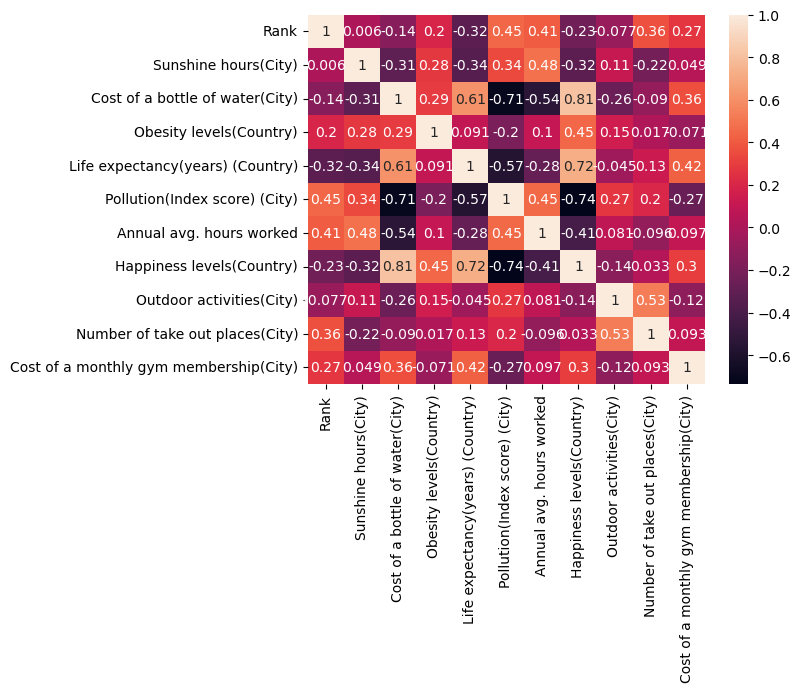

In [28]:
sns.heatmap(numeric_data.corr(), annot=True)

Happinnes and Cost of a water bottle. This is a very interesting relationship

In [29]:
import plotly.express as px

fig = px.scatter(df, y = ("Cost of a bottle of water(City)"), x=("Happiness levels(Country)"), title ="The cost of a water bottle and happiness levels")
fig.show()

In [30]:
#Lets see the relationship between happiness and sunshine hours
fig = px.histogram(df, y = ("Sunshine hours(City)"), x=("Happiness levels(Country)"), title ="Sunshine hours and level of Happiness")
fig.show()

It is expected that the happiness levels would be high with more hours of sunshine. 

In [31]:
#Happiness and Life expectancy
fig = px.histogram(df, y = ("Life expectancy(years) (Country)"), x=("Happiness levels(Country)"), title ="The effect of Life Expectancy on happiness levels")
fig.show()

We see that the higher the life expectancy the higher the happiness levels. 

In [32]:
fig = px.scatter(df, y = ("Cost of a monthly gym membership(City)"), x=("Happiness levels(Country)"), title ="Gym Membership and Happiness")
fig.show()

The more the cost of gym membership increases, the happier the population is according to the plot. This must be a wealthy sample of people. 

In [33]:
#Obesity levels(Country)
fig = px.histogram(df, y = ("Cost of a monthly gym membership(City)"), x=("Obesity levels(Country)"), title ="Gym Membership Vs Obesity Level")
fig.show()


In [36]:
fig = px.histogram(df, x="Happiness levels(Country)")
fig.show()

Theres no relationship between the cost of gym membership and obesity levels. Serves to show that staying active and fit does not always have to mean going to the gym. 

In [34]:
fig = px.histogram(df, x="Happiness levels(Country)", y="City", title = "Happiness levels by City")
fig.show()

Helsinki, Geneva and Zurich are the happiest cities. With Helsinki in the lead. 

In [35]:
#The distribution of the cost of a water bottle per city
fig = px.histogram(df, x="Cost of a bottle of water(City)", y="City", title = "Cost of bottle of water")
fig.show()

It's no surprise that it costs more in Zurich, followed by Geneva and Copenhagen. The bottle of water is cheapest in Mumbai and Instanbul--going for 0.15 cents. 

In [36]:
fig = px.histogram(df, x="Life expectancy(years) (Country)", y="Happiness levels(Country)",
              labels={"Life expectancy(years) (Country)": "Life Expectancy in years","Happiness levels(Country)": "Happiness level" },
              title="Life Expectancy Vs Happiness")
fig.show()

In [37]:
fig = px.histogram(df, x="City", y="Life expectancy(years) (Country)", 
                   labels={"Life expectancy(years) (Country)": "Life expectancy(years)"},
                           title = "Life Expectancy by City").update_xaxes(categoryorder="total descending"
                    )
fig.show()

Life expectancy is highest in Tokyo, Japan(Beacuse of their healthy diet and lifestyle),  followed by Milan, Italy which is also known for healthy mediteranean diet. Life expectancy is lowest in Johannesburg, South Africa. 

In [38]:
fig = px.histogram(df, x="City", y="Outdoor activities(City)", 
                   labels={"City":"City","Outdoor activities(City)":"Level of Engagement"},
                   title = "Engagement in Outdoor Activities").update_xaxes(categoryorder="total descending"
                    )
fig.show()

Barcelona leads when it comes to the level of outdoor activities. 
Frankfurt has the lowest outdoor activity level. 

In [39]:
#Lets see which city has a more expensive gym membership. 
fig = px.histogram(df, x="City", y="Cost of a monthly gym membership(City)", 
                   labels={"Cost of a monthly gym membership(City)": "Cost"}, 
                   title = "Cost of Gym Membership by City").update_xaxes(categoryorder="total descending"
                    )
fig.show()

In [40]:
fig = px.histogram(df, x="City", y="Happiness levels(Country)", 
                   labels={"Happiness levels(Country)": "Level of Happiness"}, 
                   title = "Happiness Levels").update_xaxes(categoryorder="total descending"
                    )
fig.show()

As expected, Gym membership is more expensive in Zurich. Its cheapest in Sao Paolo

In [41]:
#Id live to plot the obesity level by city 
fig = px.histogram(df, x="City", y="Obesity levels(Country)", 
                   labels={"Obesity levels(Country)": "Obesity Level"},
                   title = "Obesity Level").update_xaxes(categoryorder="total descending"
                                                                 )
fig.show()


US cities Wahington, Boston, New York, San Fransisco and Chicago are in the lead as the most Obese cities. 
Mumbai has the lowest Obesity level followed by Tokyo

In [42]:
fig = px.scatter(df, y = ("Number of take out places(City)"), x=("Obesity levels(Country)"), title ="Obesity Levels Vs Number of takeout places")
fig.show()

In [43]:
fig = px.scatter(df, y = ("Number of take out places(City)"), x=("City"), title ="Obesity Levels Vs Number of takeout places")
fig.show()

London has the most take out places, while Beijing has the least. 

In [44]:
#Average work hours by city
fig = px.histogram(df, x="Annual avg. hours worked", y="City", title = "Annual Average Work Hours by City")
fig.show()


Average work hours are highest in Mexico City, followed by Seoul. 
They are lowest in Frankfurt, Berlin and Copenhagen. 

In [45]:
#Let's take a look at pollution levels. 
fig = px.histogram(df, x="City", y="Pollution(Index score) (City)", 
                   labels={"Pollution(Index score) (City)": "Pollution Index Score"}, 
                   title = "Pollution Score by City").update_xaxes(categoryorder="total descending"
                                                                 )
fig.show()



Pollution is on the high in Cairo, Mexico City, Jarkata and Beijing. 
It's lowest in Helsinki.

In [46]:
#I'd like to see the relationship between polution and happiness levels. 
fig = px.histogram(df, x="Pollution(Index score) (City)", y="Happiness levels(Country)", title = "Effect of Pollution on happiness")
fig.show()



We see that happiness levels are lowest with high pollution index score. 

In [47]:
#Checking for outliers in the dataset
#i'll drop the rank column as it is the same as the index
df = df.drop('Rank', axis=1)

In [48]:
numeric_data
numeric_data = numeric_data.drop('Rank', axis=1)


In [49]:
numeric_data.dtypes

Sunshine hours(City)                      float64
Cost of a bottle of water(City)           float64
Obesity levels(Country)                   float64
Life expectancy(years) (Country)          float64
Pollution(Index score) (City)             float64
Annual avg. hours worked                  float64
Happiness levels(Country)                 float64
Outdoor activities(City)                    int64
Number of take out places(City)             int64
Cost of a monthly gym membership(City)    float64
dtype: object

<Axes: xlabel='Happiness levels(Country)'>

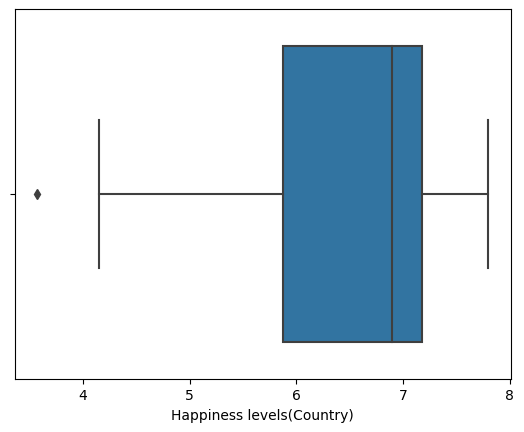

In [50]:
sns.boxplot(x=df["Happiness levels(Country)"])

<Axes: xlabel='Sunshine hours(City)'>

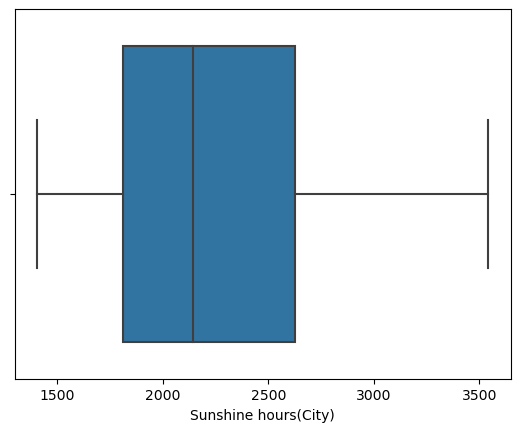

In [51]:
sns.boxplot(x=df["Sunshine hours(City)"])

<Axes: xlabel='Cost of a bottle of water(City)'>

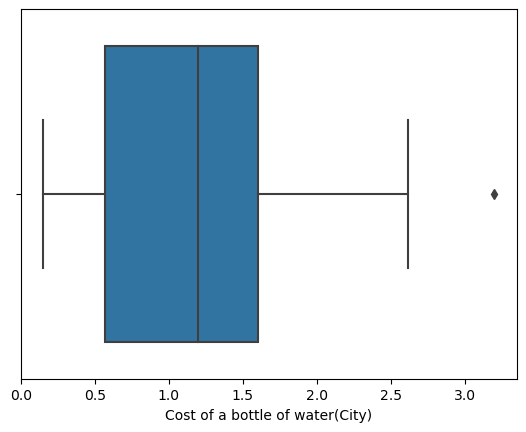

In [52]:
sns.boxplot(x=df["Cost of a bottle of water(City)"])

<Axes: xlabel='Obesity levels(Country)'>

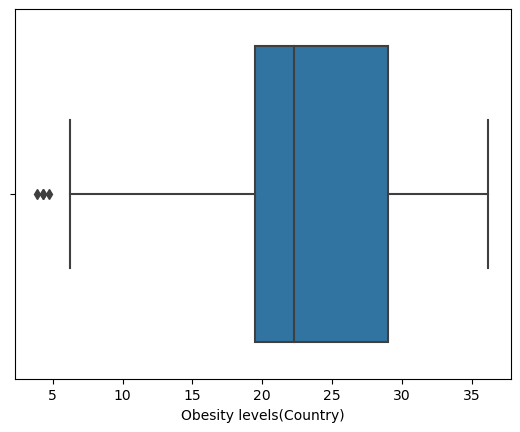

In [53]:
sns.boxplot(x=df["Obesity levels(Country)"])

In [54]:
sns.boxplot(x=df["Life expectancy(years) (Country)"])v

SyntaxError: invalid syntax (1407918361.py, line 1)

<Axes: xlabel='Pollution(Index score) (City)'>

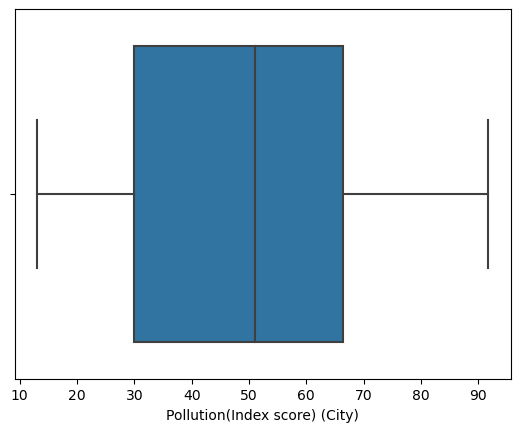

In [55]:
sns.boxplot(x=df["Pollution(Index score) (City)"])

<Axes: xlabel='Annual avg. hours worked'>

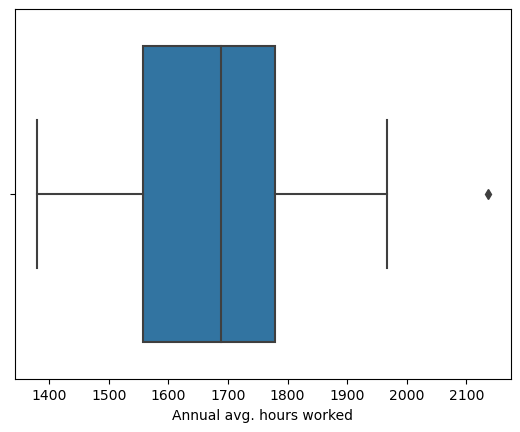

In [56]:
sns.boxplot(x=df["Annual avg. hours worked"])

<Axes: xlabel='Outdoor activities(City)'>

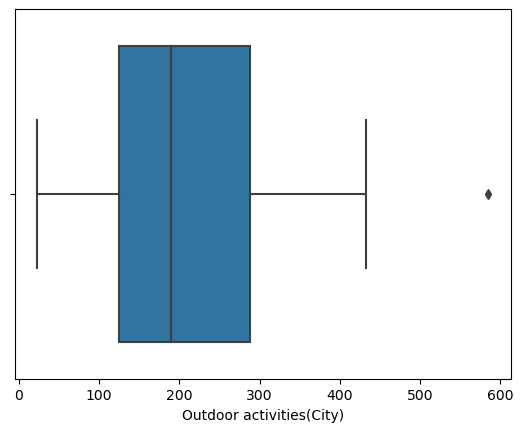

In [57]:
sns.boxplot(x=df["Outdoor activities(City)" ])

<Axes: xlabel='Cost of a monthly gym membership(City)'>

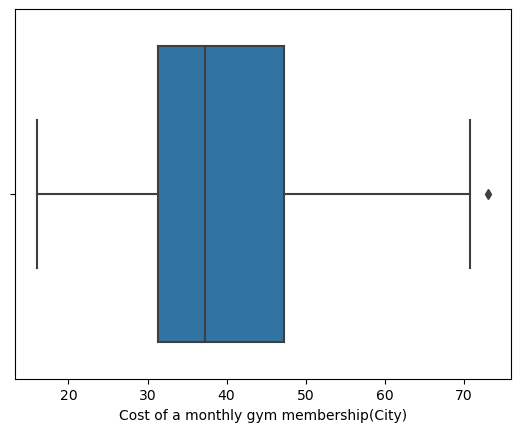

In [58]:
sns.boxplot(x=df["Cost of a monthly gym membership(City)" ])

/Users/ireneadeke/Desktop/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



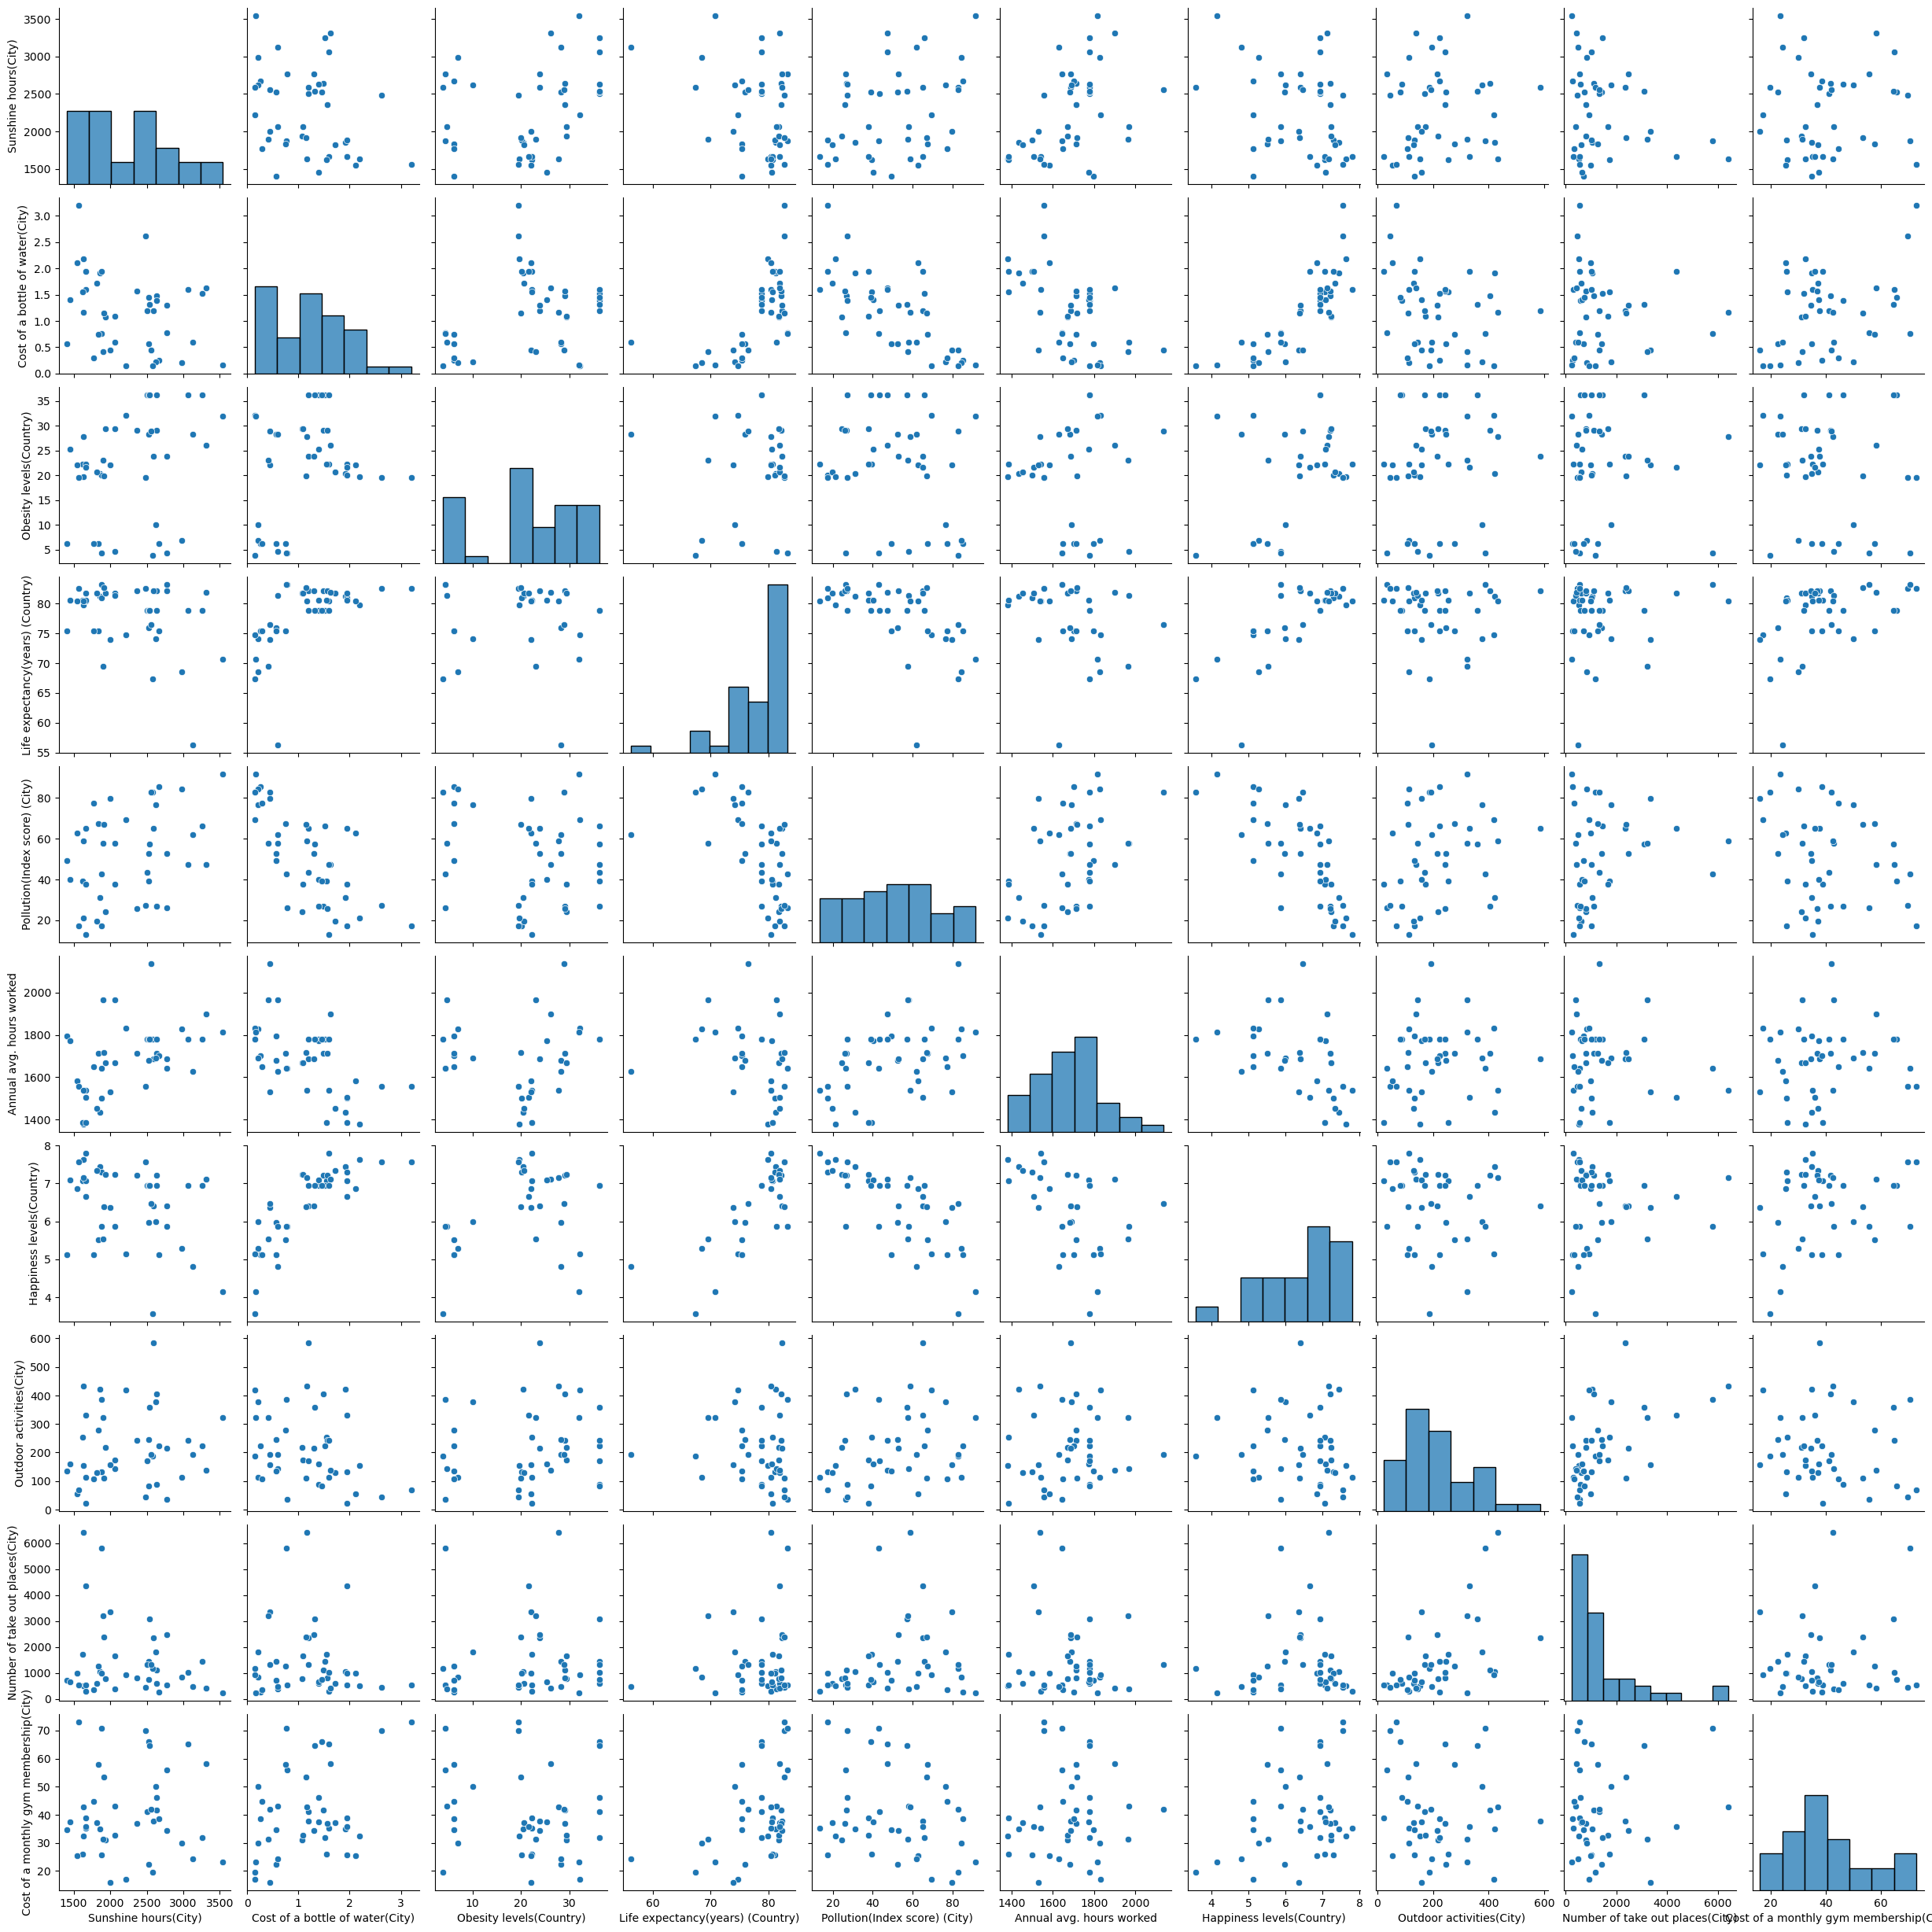

In [59]:
sns.pairplot(df)

Sunshine hours(City)


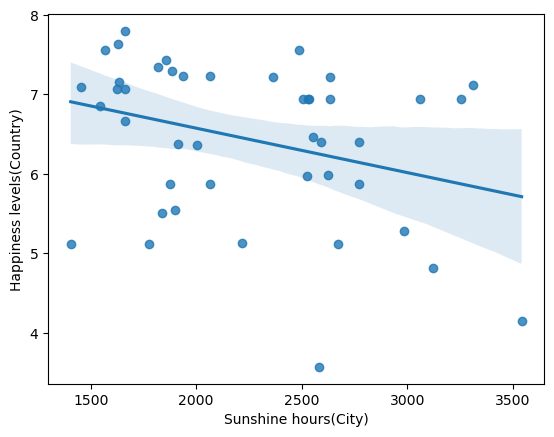

Cost of a bottle of water(City)


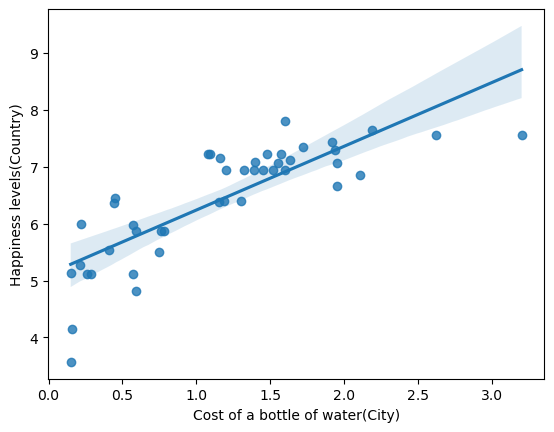

Obesity levels(Country)


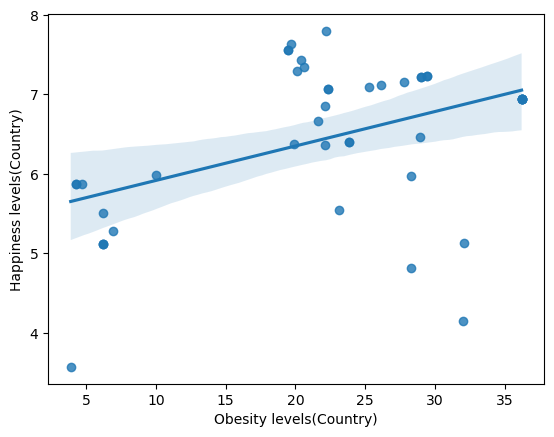

Life expectancy(years) (Country)


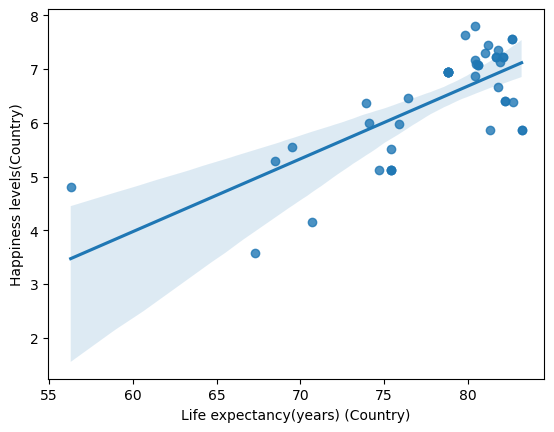

Pollution(Index score) (City)


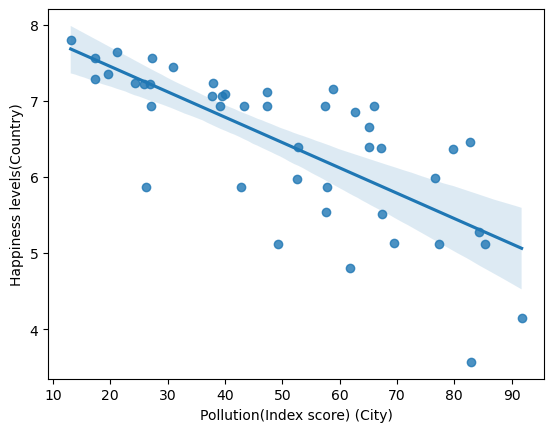

Annual avg. hours worked


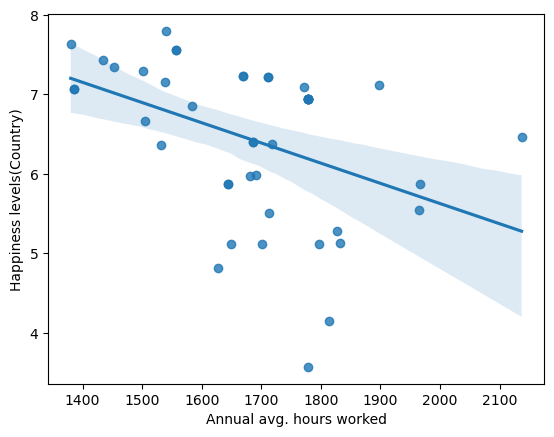

Happiness levels(Country)


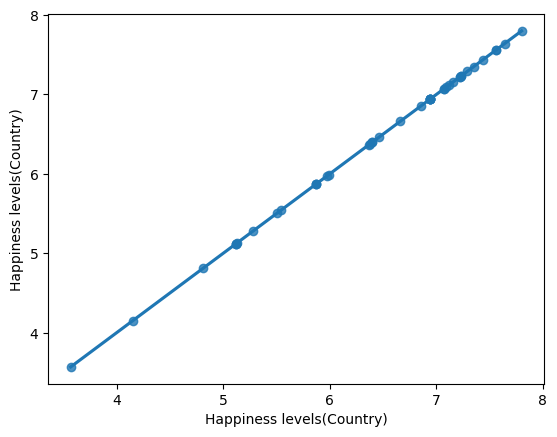

Outdoor activities(City)


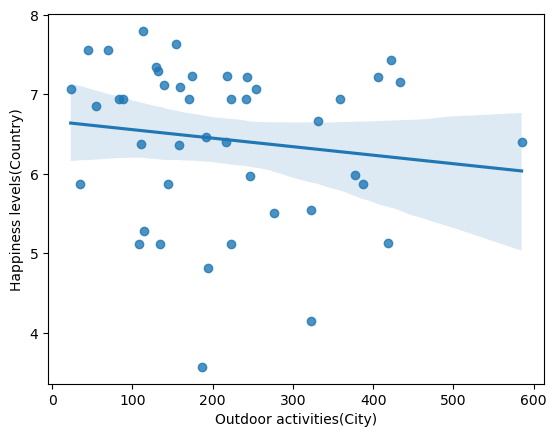

Number of take out places(City)


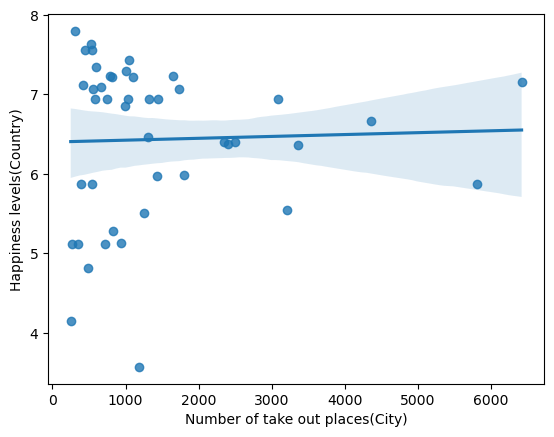

Cost of a monthly gym membership(City)


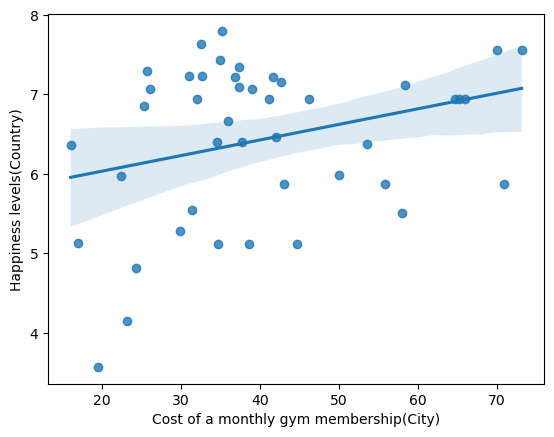

In [60]:
for column in numeric_data:
    print(column)
    sns.regplot(data = df, x =column, y="Happiness levels(Country)")
    plt.show()

In [61]:
#Predicting happiness levels with reference to other variables
#Target Variable is happiness levels(Country)

In [62]:
#Splitting X and Y train
X = numeric_data.drop(columns=["Happiness levels(Country)"])
y = numeric_data["Happiness levels(Country)"]


In [63]:
#Train Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [64]:
display(X_train)
X_test

Sunshine hours(City)  Cost of a bottle of water(City)  \
31                1776.0                             0.29   
29                2508.0                             1.20   
20                3311.0                             1.63   
41                2535.0                             1.32   
2                 1884.0                             1.94   
43                2555.0                             0.45   
18                1662.0                             1.95   
15                2769.0                             1.30   
22                3542.0                             0.16   
16                2983.0                             0.21   
40                2528.0                             1.45   
8                 2591.0                             1.19   
13                2525.0                             0.57   
5                 1662.0                             1.60   
17                2066.0                             0.59   
32                1546.0                             2.11   
14                2066.0                             1.09   
35                2003.0                             0.44   
7                 1626.0                             1.55   
34                1662.0                             1.95   
1                 2636.0                             1.48   
26                2634.0                             1.39   
12                2624.0                             0.22   
33                3062.0                             1.60   
24                3254.0                             1.52   
6                 2769.0                             0.78   
23                1405.0                             0.57   
36                1566.0                             3.20   
21                2218.0                             0.15   
19                2486.5                             2.62   
9                 1938.0                             1.08   
39                1915.0                             1.15   
42                1901.0                             0.41   
3                 1821.0                             1.72   
0                 1858.0                             1.92   

    Obesity levels(Country)  Life expectancy(years) (Country)  \
31                      6.2                              75.4   
29                     36.2                              78.8   
20                     26.1                              81.9   
41                     36.2                              78.8   
2                      20.1                              81.0   
43                     28.9                              76.4   
18                     22.3                              80.6   
15                     23.8                              82.2   
22                     32.0                              70.7   
16                      6.9                              68.5   
40                     36.2                              78.8   
8                      23.8                              82.2   
13                     28.3                              75.9   
5                      22.2                              80.4   
17                      4.7                              81.3   
32                     22.1                              80.4   
14                     29.4                              81.7   
35                     22.1                              73.9   
7                      22.3                              80.6   
34                     21.6                              81.8   
1                      29.0                              82.1   
26                     36.2                              78.8   
12                     10.0                              74.1   
33                     36.2                              78.8   
24                     36.2                              78.8   
6                       4.3                              83.2   
23                      6.2                         

Sunshine hours(City)  Cost of a bottle of water(City)  \
30                1836.0                             0.75   
37                1633.0                             1.16   
27                1453.0                             1.40   
4                 1630.0                             2.19   
10                2363.0                             1.57   
25                2584.0                             0.15   
28                1877.0                             0.76   
11                2671.0                             0.26   
38                3124.0                             0.59   

    Obesity levels(Country)  Life expectancy(years) (Country)  \
30                      6.2                              75.4   
37                     27.8                              80.4   
27                     25.3                              80.5   
4                      19.7                              79.8   
10                     29.0                              82.1   
25                      3.9                              67.3   
28                      4.3                              83.2   
11                      6.2                              75.4   
38                     28.3                              56.3   

    Pollution(Index score) (City)  Annual avg. hours worked  \
30                          67.46               1713.666667   
37                          58.91               1538.000000   
27                          40.07               1772.000000   
4                           21.24               1380.000000   
10                          25.90               1712.000000   
25                          82.84               1779.000000   
28                          42.84               1644.000000   
11                          85.43               1701.500000   
38                          61.83               1628.000000   

    Outdoor activities(City)  Number of take out places(City)  \
30                       277                             1257   
37                       433                             6417   
27                       159                              659   
4                        154                              523   
10                       243                              813   
25                       187                             1183   
28                       387                             5802   
11                       223                              261   
38                       194                              492   

    Cost of a monthly gym membership(City)  
30                                   57.95  
37                                   42.71  
27                                   37.35  
4                                    32.53  
10                                   36.89  
25                                   19.54  
28                                   70.82  
11                                   38.62  
38                                   24.28

In [65]:
len(X_train)/len(X)

0.7954545454545454

In [66]:
#Scaling the numerical variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [67]:
scaler

StandardScaler()

In [68]:
#Fitting and transforming the data with the scaler
x_train = scaler.fit_transform(X_train)

In [69]:
x_test = scaler.transform(X_test)

In [70]:
x_train

array([[-0.91327643, -1.28985003, -1.801942  , -0.88437093,  1.2870905 ,
        -0.24793894, -0.73594953, -0.97961272,  0.28194428],
       [ 0.40660185, -0.03160429,  1.36730272, -0.00955679, -0.2935144 ,
         0.53048721, -0.25555619,  0.0031712 ,  0.04269425],
       [ 1.8545011 ,  0.56295139,  0.30032367,  0.78806786, -0.11026258,
         1.23941102, -0.4995655 , -0.90494536,  1.20312445],
       [ 0.45528588,  0.13431823,  1.36730272, -0.00955679,  0.35737749,
         0.53048721,  1.17799855,  1.7800526 ,  1.63228762],
       [-0.71854029,  0.99158455, -0.33352528,  0.55649942, -1.49972888,
        -1.12565414, -0.55294254, -0.31164254, -0.99811093],
       [ 0.49134813, -1.06862001,  0.59611984, -0.62707266,  1.53668411,
         2.663216  , -0.09542507, -0.00389193,  0.10014129],
       [-1.11883124,  1.00541143, -0.101114  ,  0.4535801 , -0.5509948 ,
        -1.81074858, -1.38409928, -0.77276395, -0.10126127],
       [ 0.87721418,  0.10666447,  0.05734824,  0.86525735,  0

In [71]:
#creating the linear regression with sklearn

In [72]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

regressor.fit(X_train, y_train)

LinearRegression()

In [73]:
#Getting the coefficients of the model
regressor.coef_

array([-2.12936980e-05,  4.27789827e-01,  2.02451026e-02,  4.57181437e-02,
       -1.33090304e-02, -1.31260744e-04, -4.59160247e-04,  1.27513176e-04,
        5.80977912e-04])

In [74]:
regressor.intercept_

2.782649707880244

In [75]:
#Model performance

print("train set score", regressor.score(X_train, y_train))
print("test set score", regressor.score(X_test, y_test))
#It#s slightly underfitting

train set score 0.7970854981828626
test set score 0.8431863992189923


In [76]:
#Model predictions
predictions_trainset = regressor.predict(X_train)
predictions_testset = regressor.predict(X_test)

In [77]:
# MAE, MSE

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rmse = mean_squared_error(y_train,predictions_trainset)
mae = mean_absolute_error(y_train,predictions_trainset)
r2 = r2_score(y_train,predictions_trainset)
print(rmse, mae, r2)

0.14511699769750916 0.2920495584776277 0.7970854981828626


In [78]:
rmse = mean_squared_error(y_test,predictions_testset)
mae = mean_absolute_error(y_test,predictions_testset)
r2 = r2_score(y_test,predictions_testset)
print(rmse, mae, r2)

0.2624726690168708 0.35068910685218385 0.8431863992189923


In [79]:
#Decision Trees Model
#Preparing the data
X = numeric_data.drop(columns=["Happiness levels(Country)"])
y = numeric_data["Happiness levels(Country)"]


In [80]:
#Encoding the target variable

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

y = label_encoder.fit_transform(y)

In [81]:
y

array([26, 22, 24, 25, 28, 29,  8, 18, 13, 23, 22,  3, 10,  9, 23, 13,  5,
        8, 18, 27, 20,  4,  1,  3, 17,  0, 17, 19,  8, 17,  6,  3, 16, 17,
       15, 11, 27, 21,  2, 12, 17, 17,  7, 14])

In [82]:
label_encoder.classes_

array([3.57, 4.15, 4.81, 5.12, 5.13, 5.28, 5.51, 5.54, 5.87, 5.97, 5.99,
       6.37, 6.38, 6.4 , 6.46, 6.66, 6.86, 6.94, 7.07, 7.09, 7.12, 7.16,
       7.22, 7.23, 7.29, 7.35, 7.44, 7.56, 7.64, 7.8 ])

In [83]:
#Train Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state =0)

In [84]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(min_samples_leaf =50)


classifier.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=50)

[Text(0.5, 0.5, 'gini = 0.937\nsamples = 35\nvalue = [1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1\n6, 2, 1, 1, 2, 1, 1, 1, 2, 1]')]

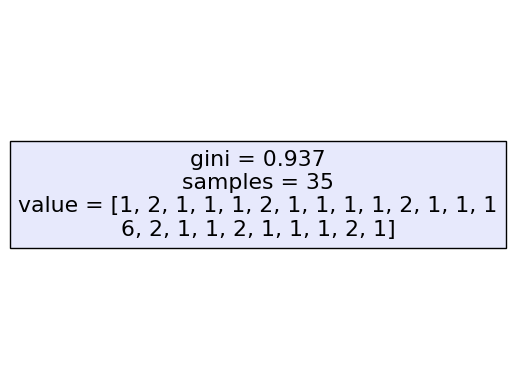

In [85]:
from sklearn import tree
tree.plot_tree(classifier, filled=True)

TypeError: can only concatenate str (not "numpy.float64") to str

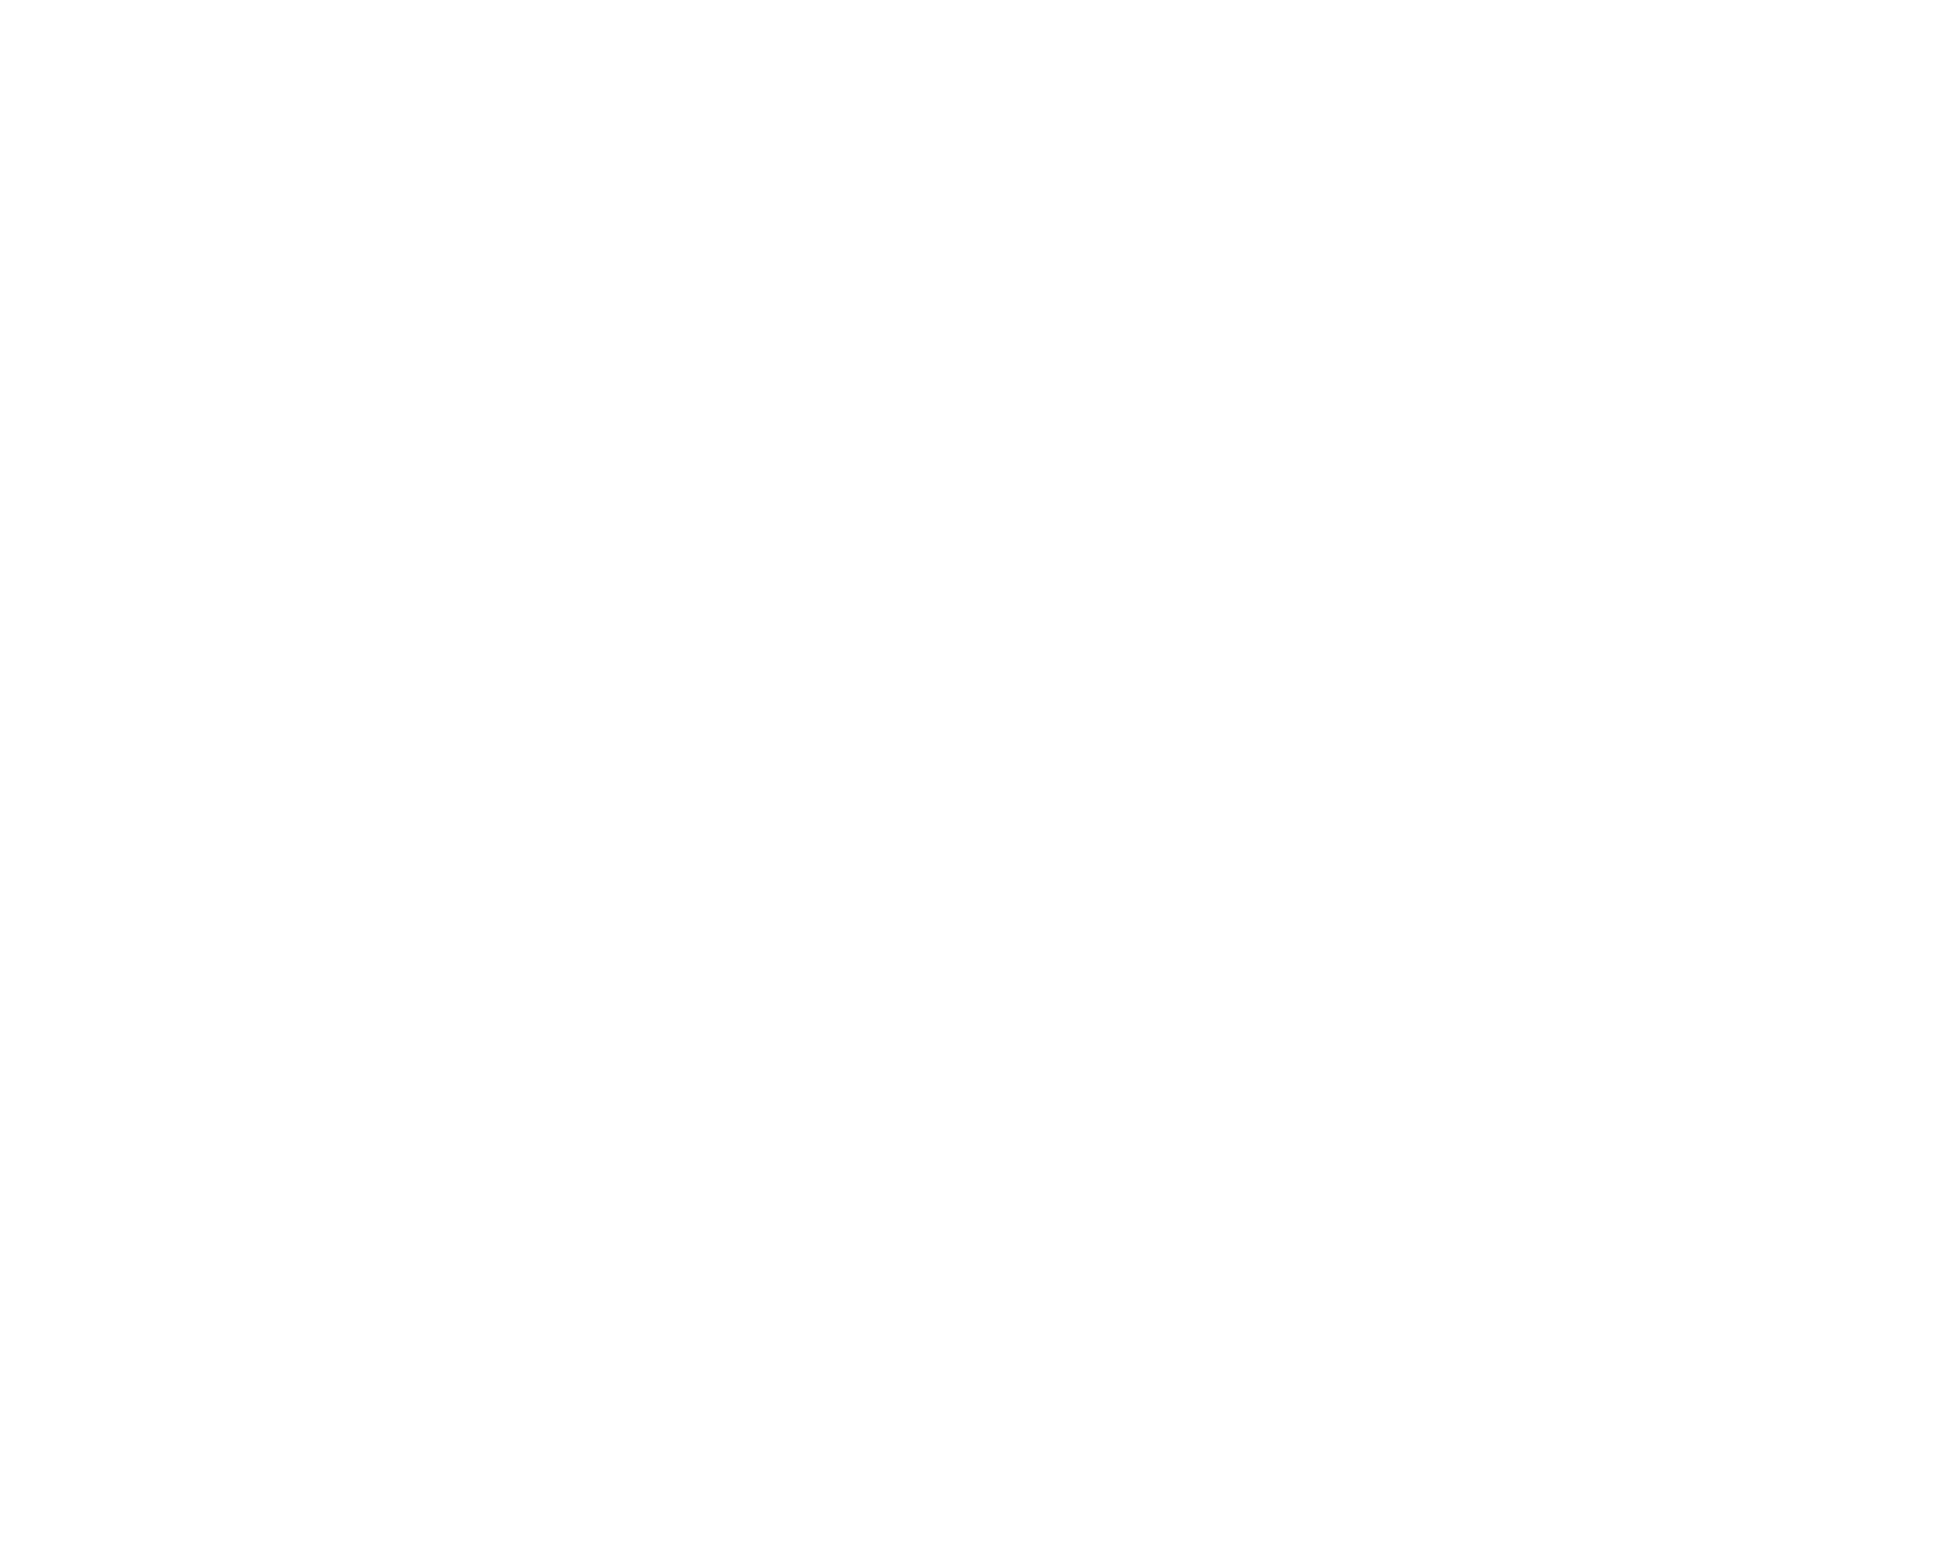

In [86]:
#Visualising the tree
fig = plt.figure(figsize =(25,20))

_ = tree.plot_tree(classifier,
                  feature_names = X.columns,
                  class_names = label_encoder.classes_,
                  filled = True)

In [87]:
text_representation = tree.export_text(classifier)

print(text_representation)

|--- class: 17



In [88]:
#Model Evaluation

In [89]:
print("Evaluation on the train score:", classifier.score(X_train, y_train))
print("Evaluation on the test score:", classifier.score(X_test, y_test))


Evaluation on the train score: 0.17142857142857143
Evaluation on the test score: 0.0


In [90]:
#Random Forest Model

In [91]:
from sklearn.ensemble import  RandomForestClassifier

classifier = RandomForestClassifier()


classifier.fit(X_train, y_train)

RandomForestClassifier()

In [92]:
#Evaluating the model
print("Evaluation on the train score:", classifier.score(X_train, y_train))
print("Evaluation on the test score:", classifier.score(X_test, y_test))

Evaluation on the train score: 1.0
Evaluation on the test score: 0.3333333333333333


<Axes: >

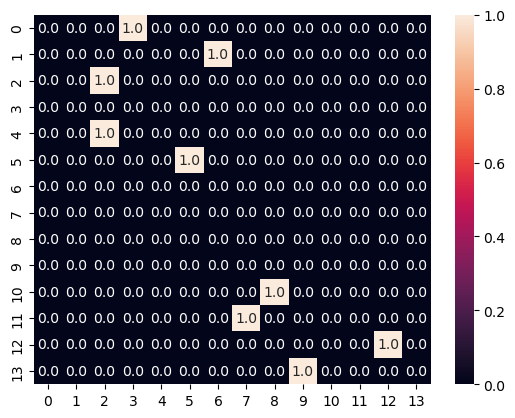

In [93]:
#Let's take a look at the confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, classifier.predict(X_test))

sns.heatmap(cm, annot =True, fmt =".1f")

In [94]:
#Confidence Interval

In [95]:
n = len(df)
mean = numeric_data.mean()
t =stats.t.ppf(0.975, df= len(df)-1) 
s = numeric_data.std()

error = s/m.sqrt(n) * t

In [98]:
confidence_interval = [mean - error, mean + error]
confidence_interval 

[Sunshine hours(City)                      2080.484345
 Cost of a bottle of water(City)              0.954922
 Obesity levels(Country)                     18.825233
 Life expectancy(years) (Country)            76.562324
 Pollution(Index score) (City)               43.891513
 Annual avg. hours worked                  1633.027896
 Happiness levels(Country)                    6.133647
 Outdoor activities(City)                   175.307888
 Number of take out places(City)           1020.878851
 Cost of a monthly gym membership(City)      35.857620
 dtype: float64,
 Sunshine hours(City)                      2422.174746
 Cost of a bottle of water(City)              1.391896
 Obesity levels(Country)                     25.024767
 Life expectancy(years) (Country)            79.787676
 Pollution(Index score) (City)               57.222351
 Annual avg. hours worked                  1731.358467
 Happiness levels(Country)                    6.736353
 Outdoor activities(City)                   252.